<a href="https://colab.research.google.com/github/FuriouStyles/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [6]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.9MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.__version__

'0.23.4'

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

--2019-09-14 16:09:50--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data’

haberman.data       100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-09-14 16:09:51 (384 MB/s) - ‘haberman.data’ saved [3103/3103]



## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Load the data as a pandas dataframe
df = pd.read_csv('haberman.data')

In [185]:
# Inspect the data and validate it has the appropriate number of observations, which is 4
df.shape
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [186]:
df.tail()

,30,64,1,1.1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [9]:
# Check for null values
df.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [0]:
# Add names to the features (headers to columns)
col_names = ['age', 'operation_year', 'num_axillary_nodes', 'survival_status']
df.columns = col_names

In [0]:
# Encode survival variable as a binary
df['survival_status'].replace({2: 0}, inplace=True)

In [190]:
df.head()

,age,operation_year,num_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [191]:
df.tail()

,age,operation_year,num_axillary_nodes,survival_status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,0
304,83,58,2,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [192]:
# Determine the distribution of 5 year survival based on age and number of axillary nodes
nodes_bin = pd.cut(df['num_axillary_nodes'], 8)
age_bins = pd.cut(df['age'], 7)
ct = pd.crosstab(age_bins, df['survival_status'])
ct

survival_status,0,1
age,,
"(29.947, 37.571]",2,21
"(37.571, 45.143]",17,48
"(45.143, 52.714]",20,47
"(52.714, 60.286]",20,53
"(60.286, 67.857]",15,35
"(67.857, 75.429]",5,18
"(75.429, 83.0]",2,2


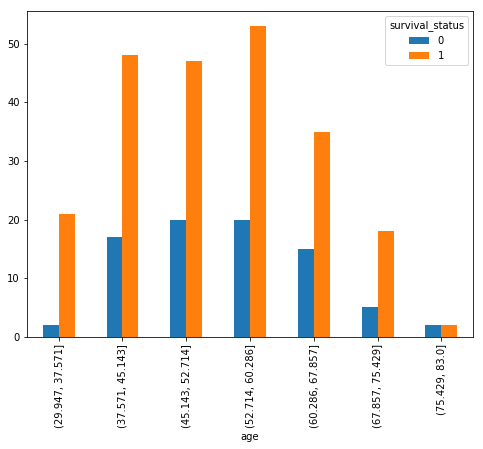

In [193]:
ct.plot(kind='bar', figsize=(8,6))

In [201]:
# Determine survival chances based on year of operation
operation_bins = pd.cut(df['operation_year'], bins = 10)
ct2 = pd.crosstab(operation_bins, df['survival_status'], normalize=True)
ct2

survival_status,0,1
operation_year,,
"(57.989, 59.1]",0.068852,0.137705
"(59.1, 60.2]",0.013115,0.078689
"(60.2, 61.3]",0.009836,0.075410
"(61.3, 62.4]",0.022951,0.052459
"(62.4, 63.5]",0.026230,0.072131
"(63.5, 64.6]",0.026230,0.072131
"(64.6, 65.7]",0.042623,0.049180
"(65.7, 66.8]",0.019672,0.072131
"(66.8, 67.9]",0.013115,0.068852


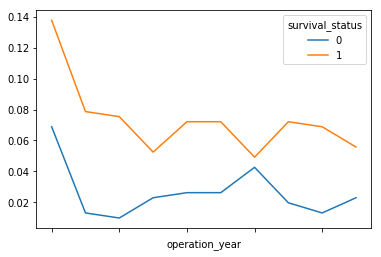

In [203]:
ct2.plot(kind='line')

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
less_than_five = df['survival_status']==0
greater_than_five = df['survival_status']==1

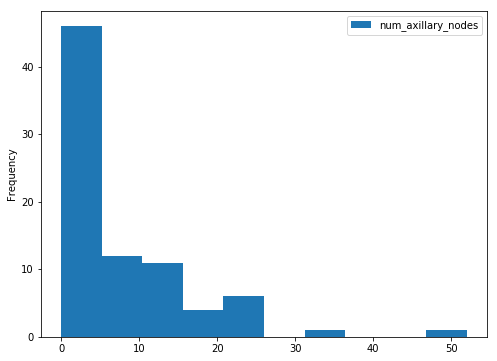

In [205]:
less_subset = df[less_than_five]
less_subset.plot('age', 'num_axillary_nodes', kind='hist', figsize=(8,6))

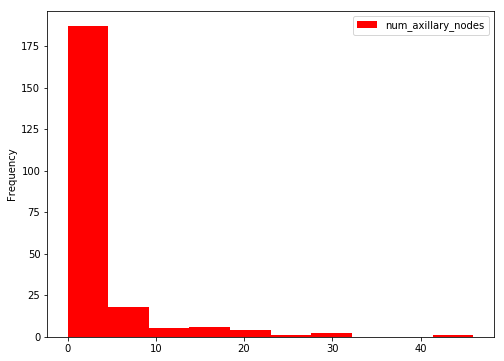

In [206]:
greater_subset = df[greater_than_five]
greater_subset.plot('age', 'num_axillary_nodes', kind='hist', figsize=(8,6), color='red')

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Early detection seems to have a very positive relationship with survival based on the data given. While we can't explicity determine that those that have a lower number of axillary nodes have benefited from early detection, we can infer that the low number of positive axillary nodes means that the cancer has not spread as thoroughly as those with a higher number of positive axillary nodes, and have thus had their cancer detected earlier.

In [207]:
pd.crosstab(age_bins, [nodes_bin, df['survival_status']])

num_axillary_nodes (-0.052, 6.5]     (6.5, 13.0] ... (32.5, 39.0] (45.5, 52.0]   
survival_status                0   1           0 ...            0            0  1
age                                              ...                             
(29.947, 37.571]               1  15           1 ...            0            0  0
(37.571, 45.143]              12  41           1 ...            0            1  0
(45.143, 52.714]              12  44           6 ...            0            0  0
(52.714, 60.286]               9  44           5 ...            1            0  1
(60.286, 67.857]               9  31           3 ...            0            0  0
(67.857, 75.429]               4  16           1 ...            0            0  0
(75.429, 83.0]                 2   2           0 ...            0            0  0

[7 rows x 12 columns]

In [208]:
pd.crosstab(age_bins, [nodes_bin, df['survival_status']], normalize=True)

num_axillary_nodes (-0.052, 6.5]              ...    (45.5, 52.0]          
survival_status                0         1    ...               0         1
age                                           ...                          
(29.947, 37.571]        0.003279  0.049180    ...        0.000000  0.000000
(37.571, 45.143]        0.039344  0.134426    ...        0.003279  0.000000
(45.143, 52.714]        0.039344  0.144262    ...        0.000000  0.000000
(52.714, 60.286]        0.029508  0.144262    ...        0.000000  0.003279
(60.286, 67.857]        0.029508  0.101639    ...        0.000000  0.000000
(67.857, 75.429]        0.013115  0.052459    ...        0.000000  0.000000
(75.429, 83.0]          0.006557  0.006557    ...        0.000000  0.000000

[7 rows x 12 columns]

Age has a relavent impact on survivability. Patients older than 45 that have more than 6 positive axillary nodes have lower chances of surviving past 5 years.

It seems as though older patients are more likely to develop more advanced cancers with a higher number of positive axillary nodes than younger patients. As stated previously, this leads to an inference that early detection of breast cancer, regardless of age but especially so for those over 45, is critical to survivability. 